## Problem Statement

Instagram is one of the most popular social media applications today. People using Instagram professionally are using it for promoting their business, building a portfolio, blogging, and creating various kinds of content. As Instagram is a popular application used by millions of people with different niches, Instagram keeps changing to make itself better for the content creators and the users. But as this keeps changing, it affects the reach of our posts that affects us in the long run. So if a content creator wants to do well on Instagram in the long run, they have to look at the data of their Instagram reach. That is where the use of Data Science in social media comes in.

## Dataset:-

Instagram generates a lot of data every day. When content creators post on Instagram, they do look at their engagement and reach to find the category of posts they should post more. Here’s the Instagram Data we collected from the account of the founder of Statso. Below are all the features in the data:

Impressions: Number of impressions in a post (Reach)

From Home: Reach from home

From Hashtags: Reach from Hashtags

From Explore: Reach from Explore

From Other: Reach from other sources

Saves: Number of saves

Comments: Number of comments

Shares: Number of shares

Likes: Number of Likes

Profile Visits: Numer of profile visits from the post

Follows: Number of Follows from the post

Caption: Caption of the post

Hashtags: Hashtags used in the post

## Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore") 

In [2]:
#loading the dataset

df=pd.read_csv('Instagram data.csv' , encoding='latin1')
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [3]:
#Checking Null values
df.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [4]:
#Let’s have a look at the insights of the columns to understand the data type of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


In [5]:
#Checking Duplicated
df.duplicated().sum()

17

In [6]:
#dropping duplicates
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

0

In [8]:
df.shape

(102, 13)

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Impressions,102.0,5920.254902,5139.888111,1941.0,3556.00,4343.5,6296.25,36919.0
From Home,102.0,2496.911765,1588.377397,1133.0,1923.75,2216.0,2605.25,13473.0
From Hashtags,102.0,1968.284314,1977.298128,116.0,753.00,1326.0,2415.75,11817.0
From Explore,102.0,1178.568627,2797.212621,0.0,178.75,337.0,728.50,17414.0
From Other,102.0,184.549020,309.096051,9.0,40.25,75.0,218.50,2547.0
Saves,102.0,156.549020,157.770332,22.0,70.50,111.0,173.50,1095.0
Comments,102.0,6.352941,3.308097,0.0,4.00,6.0,8.00,19.0
Shares,102.0,9.303922,10.150149,0.0,3.00,6.5,13.00,75.0
Likes,102.0,176.823529,85.151747,72.0,122.00,157.5,208.75,549.0
Profile Visits,102.0,54.666667,93.169954,4.0,16.00,24.0,45.75,611.0


## Exploratory Data Analysis

In [10]:
df.head(1)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...


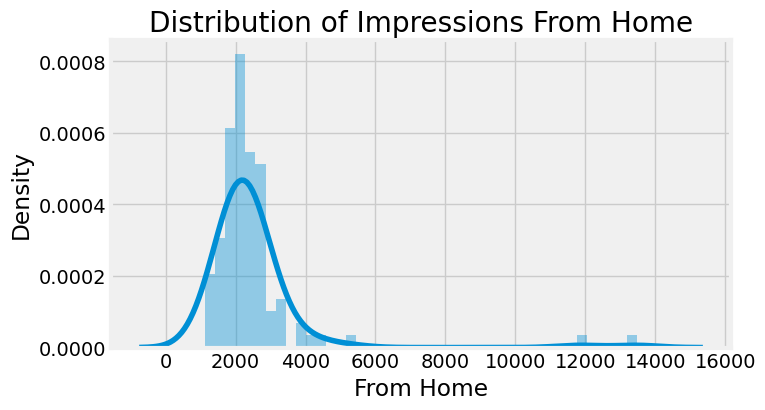

In [11]:
#Distribution of Impressions From Home

plt.figure(figsize=(8, 4))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.distplot(df['From Home'])
plt.show()

The impressions I get from the home section on Instagram shows how much my posts reach my followers. Looking at the impressions from home, I can say it’s hard to reach all my followers daily.

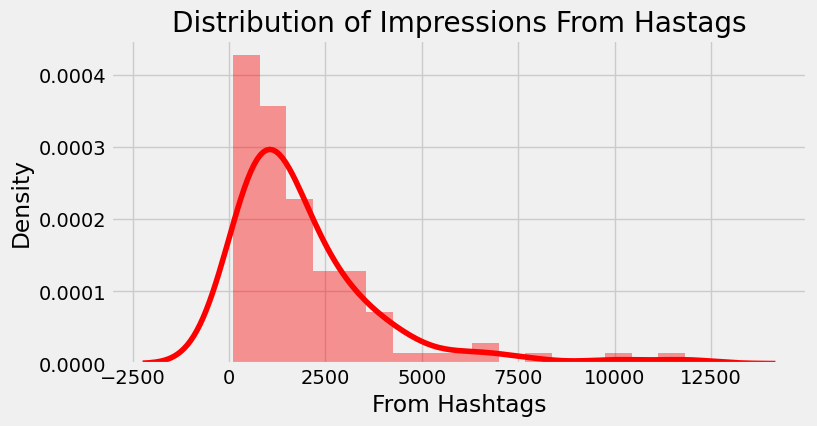

In [12]:
#Distribution of Impressions From Hastags

plt.figure(figsize=(8, 4))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Hastags")
sns.distplot(df['From Hashtags'],color='red')
plt.show()

Hashtags are tools we use to categorize our posts on Instagram so that we can reach more people based on the kind of content we are creating. Looking at hashtag impressions shows that not all posts can be reached using hashtags, but many new users can be reached from hashtags.

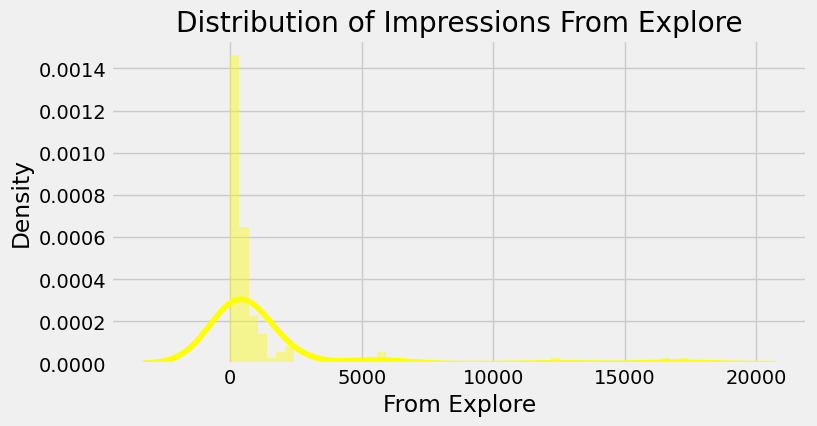

In [13]:
#Distribution of Impressions From Explore

plt.figure(figsize=(8, 4))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Explore")
sns.distplot(df['From Explore'],color='yellow')
plt.show()


The explore section of Instagram is the recommendation system of Instagram. It recommends posts to the users based on their preferences and interests. By looking at the impressions I have received from the explore section, I can say that Instagram does not recommend our posts much to the users. Some posts have received a good reach from the explore section, but it’s still very low compared to the reach I receive from hashtags.

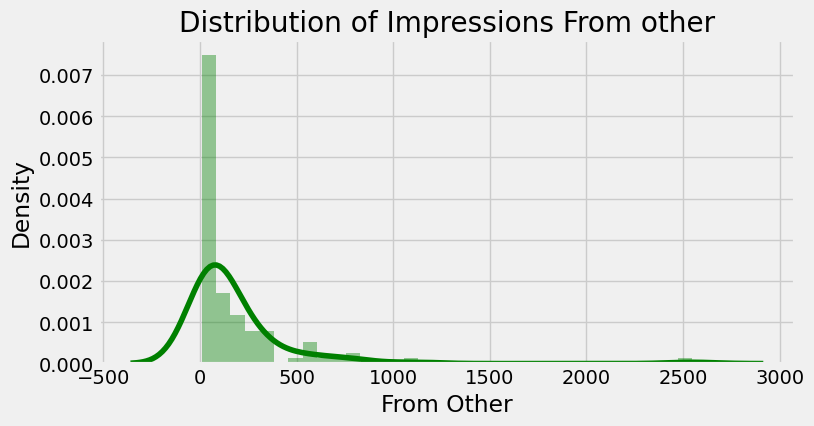

In [14]:
#Distribution of Impressions From other

plt.figure(figsize=(8, 4))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From other")
sns.distplot(df['From Other'],color='green')
plt.show()

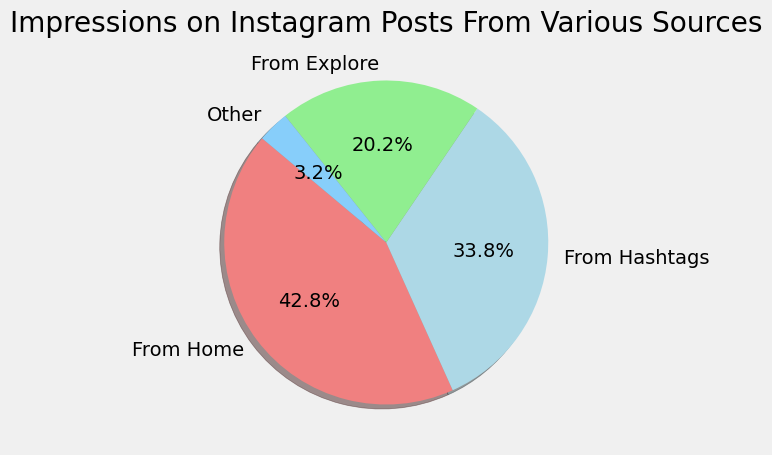

In [15]:
#Impressions on Instagram Posts From Various Sources

home=df['From Home'].sum()
hashtag=df['From Hashtags'].sum()
explore=df['From Explore'].sum()
other=df['From Other'].sum()

labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtag, explore, other]
colors = ['lightcoral', 'lightblue', 'lightgreen', 'lightskyblue']

plt.figure(figsize=(10,5))
plt.pie(values,labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Impressions on Instagram Posts From Various Sources')
plt.show()

In [16]:
df.head(1)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...


#Analyzing Relationships

Now let’s analyze relationships to find the most important factors of our Instagram reach. It will also help us in understanding how the Instagram algorithm works.

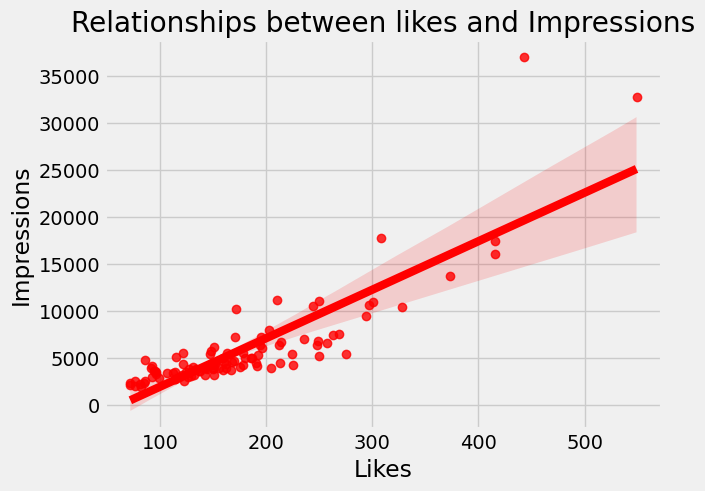

In [17]:
x = df['Likes']
y = df['Impressions']


sns.regplot(x=x, y=y, color='red')
# regplot function is a convenient way to create a scatter plot with a regression line (trendline)
plt.title("Relationships between likes and Impressions")
plt.show()

Conclusion:There is a linear relationship between the number of likes and the reach I got on Instagram.As the no of likes increase in our post the impressions we got more so we can conclude when likes increase our post reached more no of users

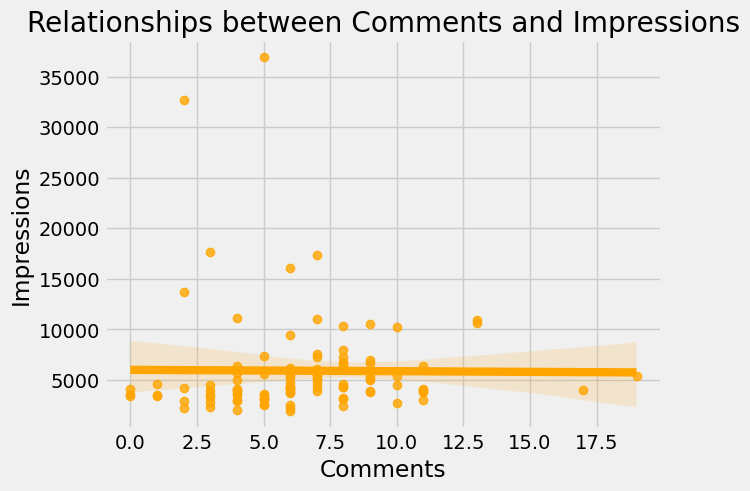

In [18]:
x = df['Comments']
y = df['Impressions']


sns.regplot(x=x, y=y, color='orange')
plt.title("Relationships between Comments and Impressions")
plt.show()

Conclusion:It looks like the number of comments we get on a post doesn’t affect its reach.

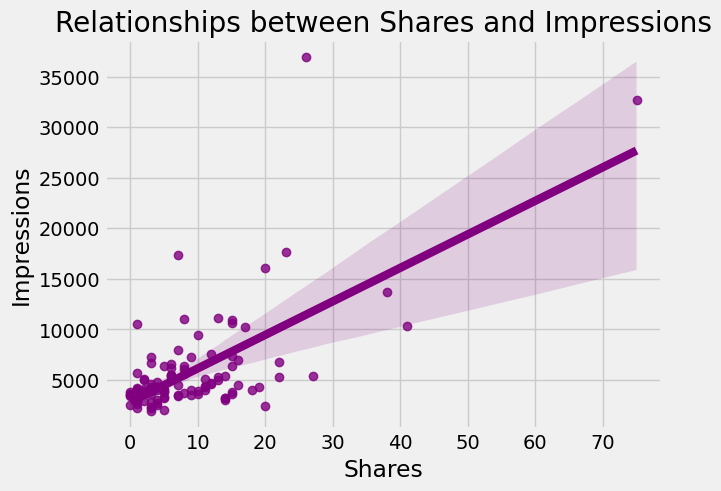

In [19]:
x = df['Shares']
y = df['Impressions']


sns.regplot(x=x, y=y, color='purple')
plt.title("Relationships between Shares and Impressions")
plt.show()

Conclusion:A more number of shares will result in a higher reach, but shares don’t affect the reach of a post as much as likes do.

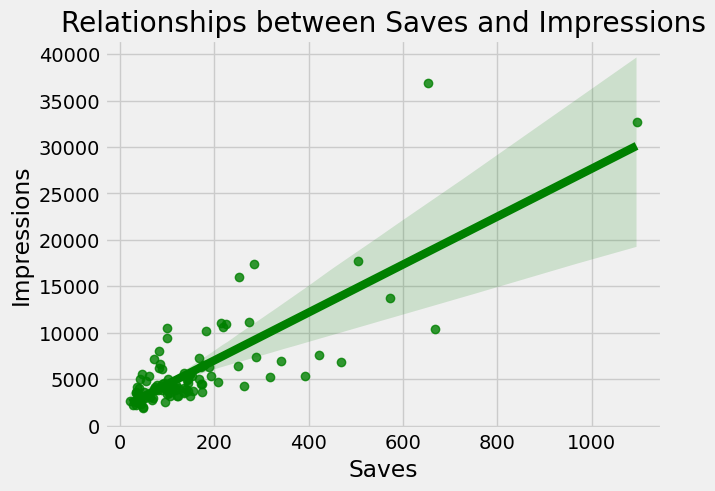

In [20]:
x = df['Saves']
y = df['Impressions']


sns.regplot(x=x, y=y, color='green')
plt.title("Relationships between Saves and Impressions")
plt.show()

Conclusion:There is a linear relationship between the number of times my post is saved and the reach of my Instagram post.

__Analyzing Conversion Rate__


In Instagram, conversation rate means how many followers you are getting from the number of profile visits from a post. The formula that you can use to calculate conversion rate is (Follows/Profile Visits) * 100. Now let’s have a look at the conversation rate of my Instagram account:

In [21]:
conversion_rate = (df["Follows"].sum() / df["Profile Visits"].sum()) * 100
print(conversion_rate)

41.75035868005739


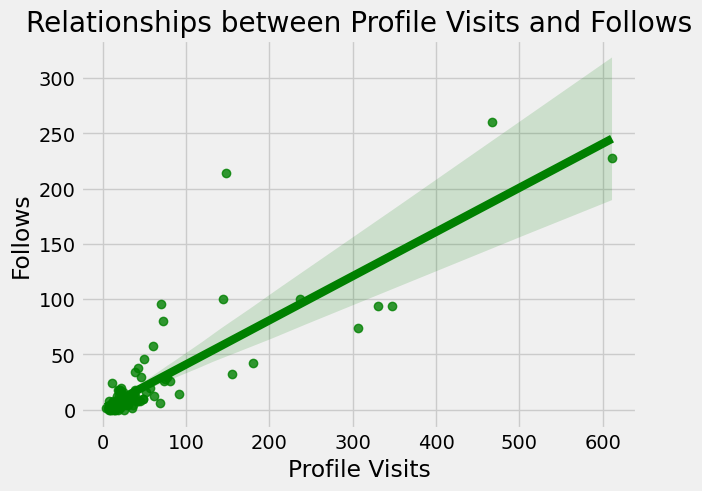

In [22]:
x = df['Profile Visits']
y = df['Follows']


sns.regplot(x=x, y=y, color='green')
plt.title("Relationships between Profile Visits and Follows")
plt.show()

The relationship between profile visits and followers gained is also linear.

In [23]:
# Exclude non-numeric columns
numeric_columns = df.select_dtypes(include=['number'])

# Calculate the correlation
correlation = numeric_columns.corr()

# Print the correlation for 'Impressions'
print(correlation["Impressions"].sort_values(ascending=False))


Impressions       1.000000
From Explore      0.895021
Follows           0.889944
Likes             0.852952
From Home         0.850210
Saves             0.791448
Profile Visits    0.762679
Shares            0.654920
From Other        0.586628
From Hashtags     0.547337
Comments         -0.008535
Name: Impressions, dtype: float64


<Axes: >

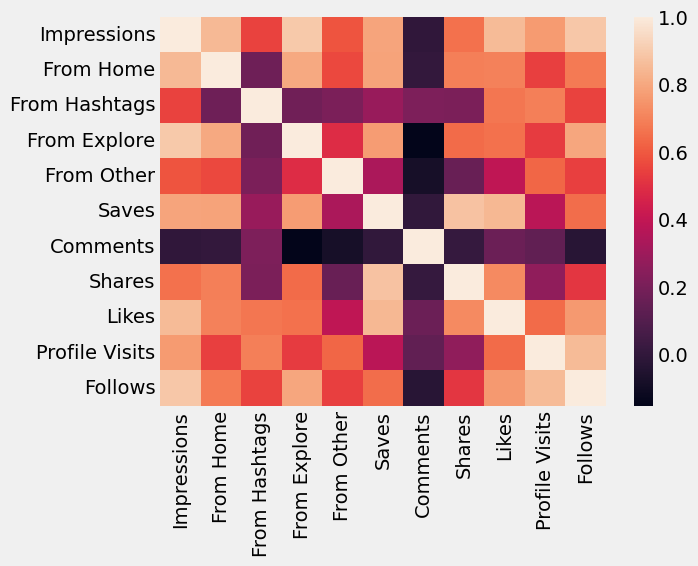

In [24]:
sns.heatmap(correlation )

In [25]:
# Engagement rate in terms of Impressions

df['engagement_rate_impression'] = ((df['Likes'] + df['Comments'] + df["Shares"]) / df['Impressions']) * 100

print(df['engagement_rate_impression'])


0      4.489796
1      4.542084
2      3.556329
3      5.079505
4      5.242256
         ...   
114    3.014599
115    2.669691
116    2.246920
117    1.914666
118    1.283892
Name: engagement_rate_impression, Length: 102, dtype: float64


In [26]:
df.head(1)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags,engagement_rate_impression
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...,4.489796


## Text Preprocessing

In [27]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatization(Caption):
    # Remove non-alphabet characters and convert to lowercase
    cleaned_caption = re.sub('[^a-zA-Z]', ' ', Caption).lower()
    # Tokenize the cleaned caption
    words = cleaned_caption.split()
    # Lemmatize each word and filter out stopwords
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords.words('english')]
    # Join the lemmatized words to form a sentence
    lemmatized_caption = ' '.join(lemmatized_words)
    return lemmatized_caption


df['Caption'] = df['Caption'].apply(lemmatization)

In [28]:
df['Caption']

0      important data visualization every financial d...
1      best data science project idea healthcare want...
2      learn train machine learning model giving inpu...
3      write python program detect whether sentence q...
4      plotting annotation visualizing data considere...
                             ...                        
114               best data science certification choose
115    clustering machine learning technique used cla...
116    clustering music genre task grouping music bas...
117               best data science certification choose
118    python project source code solved explained fr...
Name: Caption, Length: 102, dtype: object

In [29]:
from textblob import TextBlob

def spelling_correction(text):
    return TextBlob(text).correct().string

In [30]:
df['Caption'].apply(spelling_correction)

0      important data visualization every financial d...
1      best data science project idea healthcare want...
2      learn train machine learning model giving inpu...
3      write patron program detect whether sentence q...
4      clotting annexation visualizing data considere...
                             ...                        
114               best data science mortification choose
115    fluttering machine learning technique used cla...
116    fluttering music gene task grouping music base...
117               best data science mortification choose
118    patron project source code solved explained fr...
Name: Caption, Length: 102, dtype: object

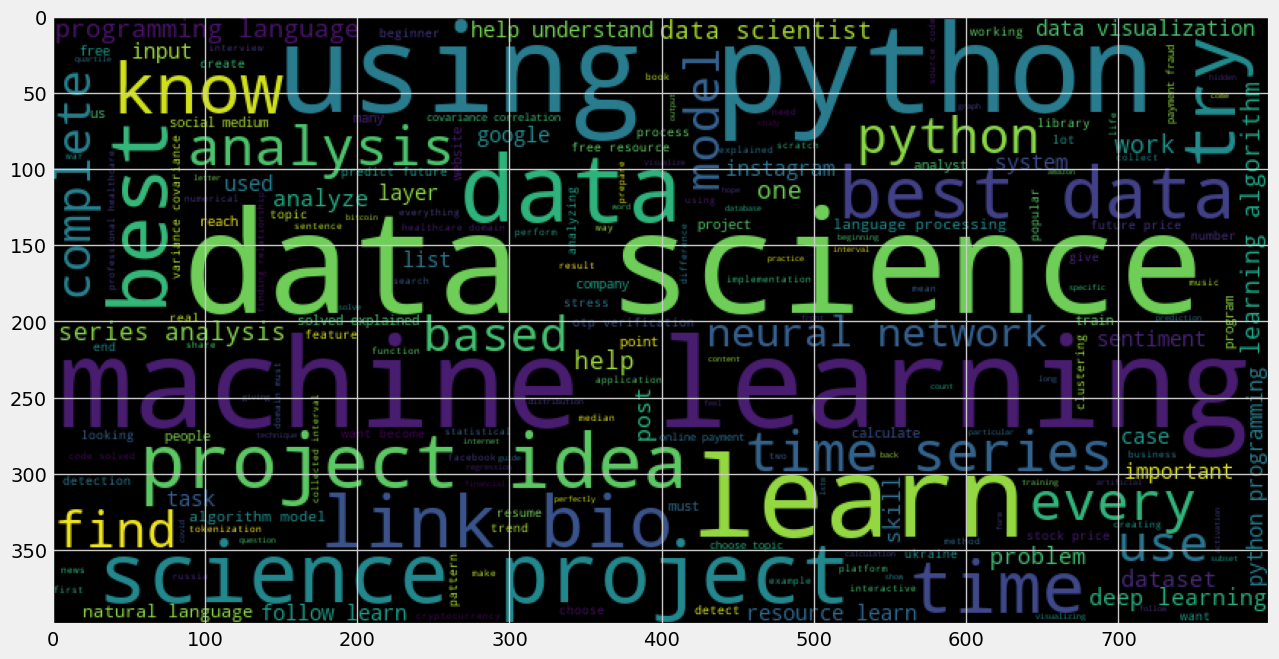

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize = (14,10))
wc = WordCloud(width = 800 , height = 400).generate(" ".join(df['Caption']))
plt.imshow(wc)

In [32]:
df['Hashtags']

0      #finance #money #business #investing #investme...
1      #healthcare #health #covid #data #datascience ...
2      #data #datascience #dataanalysis #dataanalytic...
3      #python #pythonprogramming #pythonprojects #py...
4      #datavisualization #datascience #data #dataana...
                             ...                        
114    #datascience #datasciencejobs #datasciencetrai...
115    #machinelearning #machinelearningalgorithms #d...
116    #machinelearning #machinelearningalgorithms #d...
117    #datascience #datasciencejobs #datasciencetrai...
118    #python #pythonprogramming #pythonprojects #py...
Name: Hashtags, Length: 102, dtype: object

In [33]:
def process(Hashtags):
    # Remove non-alphabet characters and convert to lowercase
    cleaned_hashtag = re.sub('[^a-zA-Z]', ' ', Hashtags).lower()
    # Tokenize the cleaned caption
    words = cleaned_hashtag.split()
    # Lemmatize each word and filter out stopwords
    lemmatized_word = [lemmatizer.lemmatize(word) for word in words if word not in stopwords.words('english')]
    # Join the lemmatized words to form a sentence
    lemmatized_hashtag = ' '.join(lemmatized_word)
    return lemmatized_hashtag


df['Hashtags'] = df['Hashtags'].apply(process)

In [34]:
df['Hashtags']

0      finance money business investing investment tr...
1      healthcare health covid data datascience dataa...
2      data datascience dataanalysis dataanalytics da...
3      python pythonprogramming pythonprojects python...
4      datavisualization datascience data dataanalyti...
                             ...                        
114    datascience datasciencejobs datasciencetrainin...
115    machinelearning machinelearningalgorithms data...
116    machinelearning machinelearningalgorithms data...
117    datascience datasciencejobs datasciencetrainin...
118    python pythonprogramming pythonprojects python...
Name: Hashtags, Length: 102, dtype: object

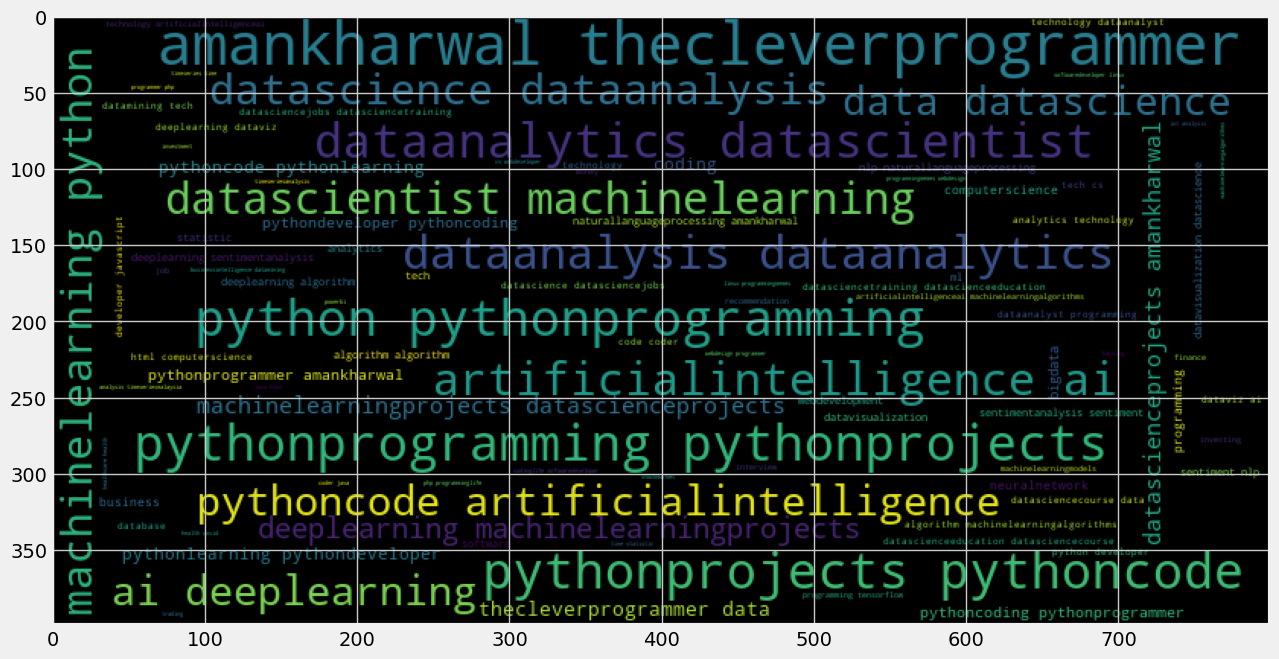

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize = (14,10))
wc = WordCloud(width = 800 , height = 400).generate(" ".join(df['Hashtags']))
plt.imshow(wc)

In [36]:
df.head(1)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags,engagement_rate_impression
0,3920,2586,1028,619,56,98,9,5,162,35,2,important data visualization every financial d...,finance money business investing investment tr...,4.489796


## Train Test Split

In [37]:
#independent and dependent features

x = df[['Likes', 'Saves', 'Comments', 'Shares', 
                   'Profile Visits', 'Follows']]
y = df["Impressions"]

xtrain, xtest, ytrain, ytest = train_test_split(x, y,test_size=0.2,random_state=42) 
                                             
                                               

## Model Training


### LinearRegression

In [38]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

model = LinearRegression()
model.fit(xtrain, ytrain)

model.score(xtest,ytest)


0.744521707217654

In [39]:
# Making the Prediction
prediction = model.predict(xtest)
prediction.shape

(21,)

In [40]:
# The Mean Squared Error and the R^Square Score
mean_squared_error(ytest, prediction), r2_score(ytest, prediction)

(12597650.025740635, 0.744521707217654)

### RandomForestRegressor

In [41]:
rf = RandomForestRegressor()
rf.fit(xtrain, ytrain)

rf.score(xtest,ytest)

0.8608050803353017

In [42]:
# Making the Prediction
prediction = rf.predict(xtest)
prediction.shape

(21,)

In [43]:
# The Mean Squared Error and the R^Square Score
mean_squared_error(ytest, prediction), r2_score(ytest, prediction)

(6863709.883919046, 0.8608050803353017)

In [44]:
# Model Feature Importance
features = rf.feature_importances_
features

array([0.25960201, 0.06806054, 0.03647946, 0.02893157, 0.15603053,
       0.4508959 ])

In [45]:

# Feature Importance with columns into DataFrame
feature_importance = pd.DataFrame([x.columns, features])
feature_importance

,0,1,2,3,4,5
0,Likes,Saves,Comments,Shares,Profile Visits,Follows
1,0.259602,0.068061,0.036479,0.028932,0.156031,0.450896


### XGB

In [46]:
xgb = XGBRegressor()
xgb.fit(xtrain, ytrain)

score = xgb.score(xtest,ytest)
print(score)

# Making the Prediction
prediction = xgb.predict(xtest)
prediction.shape

# The Mean Squared Error and the R^Square Score
mean_squared_error(ytest, prediction), r2_score(ytest, prediction)

0.9197908784238815


(3955116.6225651503, 0.9197908784238815)

In [47]:
# Model Feature Importance
features = xgb.feature_importances_
features


# Feature Importance with columns into DataFrame
feature_importance = pd.DataFrame([x.columns, features])
feature_importance

,0,1,2,3,4,5
0,Likes,Saves,Comments,Shares,Profile Visits,Follows
1,0.223759,0.0142,0.070661,0.003333,0.003957,0.68409


### XGB with Hyperparameter

In [48]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Create a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 4, 5],
}

# Create an XGBoost regressor
xgb_model = xgb.XGBRegressor()

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(xtrain, ytrain)

# Get the best model from the hyperparameter tuning
best_xgb_model = grid_search.best_estimator_

# Fit the best model on the training data
best_xgb_model.fit(xtrain, ytrain)

# Make predictions on the test data
ypred = best_xgb_model.predict(xtest)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(ytest, ypred)
print(f'Mean Squared Error: {mse}')

# You can also access the best hyperparameters and the best model using:
# best_params = grid_search.best_params_
# best_estimator = grid_search.best_estimator_


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Mean Squared Error: 8693013.891220434


In [49]:
# Model Feature Importance
features = best_xgb_model.feature_importances_
features


# Feature Importance with columns into DataFrame
feature_importance = pd.DataFrame([x.columns, features])
feature_importance

,0,1,2,3,4,5
0,Likes,Saves,Comments,Shares,Profile Visits,Follows
1,0.578863,0.057716,0.057045,0.009897,0.019081,0.277398


So this is how you can analyze and predict the reach of Instagram posts with machine learning using Python.